PROJECT 1

In [185]:
## importing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading CSV File 

In [186]:
df = pd.read_csv('datasets\\train_data.csv')

Checking basic Info

In [187]:
df.head()

,Created,CancelTime,DepartureTime,BillID,TicketID,ReserveStatus,UserID,Male,Price,CouponDiscount,...,Domestic,VehicleType,VehicleClass,TripReason,Vehicle,Cancel,HashPassportNumber_p,HashEmail,BuyerMobile,NationalCode
0,2022-10-23 09:38:49.110,NaN,2022-11-02 23:59:00,39710203,1091777.0,5,122885.0,True,6600000.0,34425.0,...,1,NaN,False,Work,Plane,0,NaN,66c7f29e3b92f3b77e20830ac29e7758037a53d2238a5b...,764974891906,477368495
1,2022-08-15 14:51:43.160,NaN,2022-08-18 04:15:00,38689463,1070902.0,5,876925.0,True,9500000.0,0.0,...,1,NaN,False,Int,Plane,0,NaN,b24634843858a4175d03422aa9e7211ec3b9f3ce4c481c...,27479149496,15987669
2,2022-09-20 17:25:27.250,NaN,2022-09-21 11:00:00,39245173,7624237.0,3,916640.0,False,2000000.0,0.0,...,1,VIP 2+1,True,Work,Bus,0,NaN,NaN,323657282999,667640412
3,2022-06-25 11:32:53.980,NaN,2022-06-26 08:30:00,37957585,2867547.0,2,NaN,False,40000.0,0.0,...,1,3 ستاره اتوبوسي,NaN,Int,Train,0,NaN,NaN,169459057632,392476186
4,2022-06-01 11:30:53.633,NaN,2022-06-02 23:00:00,37584530,7212559.0,3,NaN,True,1130000.0,0.0,...,1,اسکانیا تک صندلی ۳۱نفره,True,Int,Bus,0,NaN,NaN,408595008421,79497837


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101017 entries, 0 to 101016
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Created               101017 non-null  object 
 1   CancelTime            15326 non-null   object 
 2   DepartureTime         101017 non-null  object 
 3   BillID                101017 non-null  int64  
 4   TicketID              101017 non-null  float64
 5   ReserveStatus         101017 non-null  int64  
 6   UserID                42543 non-null   float64
 7   Male                  101017 non-null  bool   
 8   Price                 101017 non-null  float64
 9   CouponDiscount        101017 non-null  float64
 10  From                  101017 non-null  object 
 11  To                    101017 non-null  object 
 12  Domestic              101017 non-null  int64  
 13  VehicleType           93473 non-null   object 
 14  VehicleClass          62567 non-null   object 
 15  

Basic Cleaning

In [189]:
# for cancelling tickets we know its 0 and 1 so we want to keep only rows with 0 and 1 in the column 'cancel'
df = df[df['Cancel'].isin([0, 1])]

In [190]:
# make a cleaner boolean column for cancelling tickets
df["is_cancelled"] = df["Cancel"] == 1

In [191]:
#Creating boolean for "has coupon"
df["has_coupon"] = df["CouponDiscount"] > 0

Calculating cancellation Rates

In [192]:
## Group by has_coupon and do the math for cancellation rate
cancel_rates = df.groupby("has_coupon")["is_cancelled"].mean().reset_index()

In [193]:
## Make it more readable 

cancel_rates["has_coupon"] = cancel_rates["has_coupon"].replace({True: "Has Coupon", False: "No Coupon"})

## calculations 
cancel_rates["cancel_rate_percent"] = cancel_rates["is_cancelled"] * 100



In [194]:
#printing information on cancellation rate by coupon
cancel_rates[["has_coupon", "is_cancelled", "cancel_rate_percent"]].reset_index()

,index,has_coupon,is_cancelled,cancel_rate_percent
0,0,No Coupon,0.151702,15.170207
1,1,Has Coupon,0.150291,15.029094


C:\Users\joshi\AppData\Local\Temp\ipykernel_26656\920262567.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


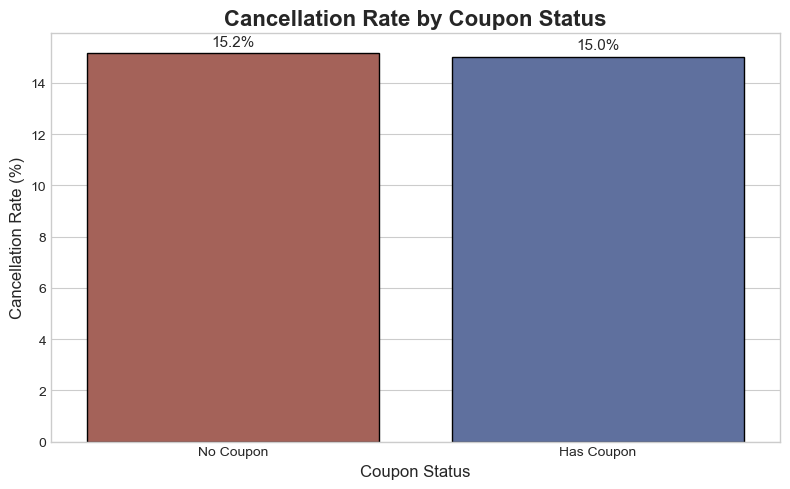

In [195]:
plt.style.use("seaborn-v0_8-whitegrid")  # nicer defaults

plt.figure(figsize=(8, 5))
sns.barplot(
    data=cancel_rates,
    x="has_coupon",
    y="cancel_rate_percent",
    palette=["#B0584C", "#556BA89F"],  # two pleasant colors
    edgecolor="black",
    linewidth=1
)

plt.title("Cancellation Rate by Coupon Status", fontsize=16, weight="bold")
plt.xlabel("Coupon Status", fontsize=12)
plt.ylabel("Cancellation Rate (%)", fontsize=12)

# Show value labels on top of bars
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.1f}%",
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                xytext=(0, 3),
                textcoords='offset points',
                fontsize=11)

plt.tight_layout()